In [86]:
import joblib
import pandas as pd
from pathlib import Path
import json
import numpy as np

### Visualize a strategie's most likely response per group

In [87]:
input_path = Path("../aof_sit_go_2p_rankroud_5_cumm_strat_2022_10_01_14_53_53_166506/agent.joblib")

In [88]:
with open(input_path, "rb") as input_file:
    e = joblib.load(input_file)

In [89]:
e.keys()

dict_keys(['regret', 'timestep', 'strategy', 'pre_flop_strategy'])

In [90]:
#e["strategy"]['{"n_players":3,"cards_cluster":0,"portion_bet":0.0,"history":[{"pre_flop":["raise"]}]}']

In [91]:
#e["strategy"]['{"n_players":3,"cards_cluster":0,"portion_bet":0.0,"history":[]}']

In [92]:
e["timestep"]

60000

In [93]:
def df_key(agent,key):
    df=pd.DataFrame(index=agent[key].keys(), data=agent[key].values())
    i=pd.DataFrame([json.loads(x) for x in df.index])
    df.reset_index(drop=True, inplace=True)
    df= pd.concat([df,i], axis=1)
    i=df.pop("history").apply(lambda x:  pd.Series(x))
    i.fillna({}, inplace=True)
    i=pd.concat([pd.json_normalize(i[n]) for n in i.columns], axis=1)
    i.fillna("", inplace=True)
    df=df.join(i)

    return df


In [94]:
def vis_key(agent,key):
    df=df_key(agent,key)
    means=df.groupby("cards_cluster")[["fold","all-in"]].mean()
    means.plot.line()


In [95]:
df_preflop=df_key(e,"strategy")
df_preflop

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,fold,all-in,n_players,cards_cluster,portion_bet,pre_flop
0,0.000000e+00,4.000000e+00,2,0,0.1,[raise]
1,1.557370e-94,4.000000e+00,2,0,0.3,[raise]
2,1.288536e-26,4.000000e+00,2,0,0.5,
3,6.857081e-49,4.000000e+00,2,0,0.5,[raise]
4,3.775135e-11,4.000000e+00,2,0,0.7,[raise]
...,...,...,...,...,...,...
165,4.000000e+00,1.526999e-53,2,95,0.5,
166,1.000000e+00,3.000000e+00,2,95,0.5,[raise]
167,4.000000e+00,2.250703e-07,2,95,0.7,[raise]
168,3.775135e-11,3.000000e+00,2,30,0.7,[raise]


In [96]:
df_strategy=df_key(e,"strategy")
df_strategy

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


,fold,all-in,n_players,cards_cluster,portion_bet,pre_flop
0,0.000000e+00,4.000000e+00,2,0,0.1,[raise]
1,1.557370e-94,4.000000e+00,2,0,0.3,[raise]
2,1.288536e-26,4.000000e+00,2,0,0.5,
3,6.857081e-49,4.000000e+00,2,0,0.5,[raise]
4,3.775135e-11,4.000000e+00,2,0,0.7,[raise]
...,...,...,...,...,...,...
165,4.000000e+00,1.526999e-53,2,95,0.5,
166,1.000000e+00,3.000000e+00,2,95,0.5,[raise]
167,4.000000e+00,2.250703e-07,2,95,0.7,[raise]
168,3.775135e-11,3.000000e+00,2,30,0.7,[raise]


In [97]:
df_strategy["portion_bet"].value_counts()

0.5    68
0.1    34
0.3    34
0.7    34
Name: portion_bet, dtype: int64

In [98]:
df_strategy["cards_cluster"].value_counts()

0      5
55     5
30     5
35     5
40     5
45     5
5      5
50     5
60     5
10     5
65     5
70     5
75     5
80     5
85     5
90     5
25     5
20     5
165    5
160    5
155    5
150    5
15     5
145    5
140    5
135    5
130    5
125    5
120    5
115    5
110    5
105    5
100    5
95     5
Name: cards_cluster, dtype: int64

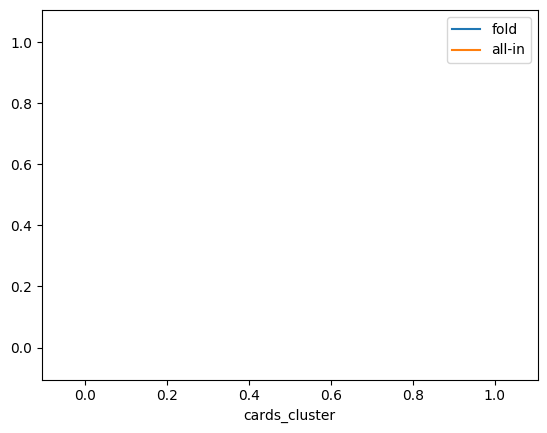

In [99]:
#strategy after initial raise for each cluster
df_strategy_afer_raise=df_strategy[df_strategy.pre_flop.astype(str).str.contains("raise")]
means=df_strategy_afer_raise[df_strategy_afer_raise["portion_bet"]==0.0].groupby("cards_cluster")[["fold","all-in"]].mean()
means.plot.line() 

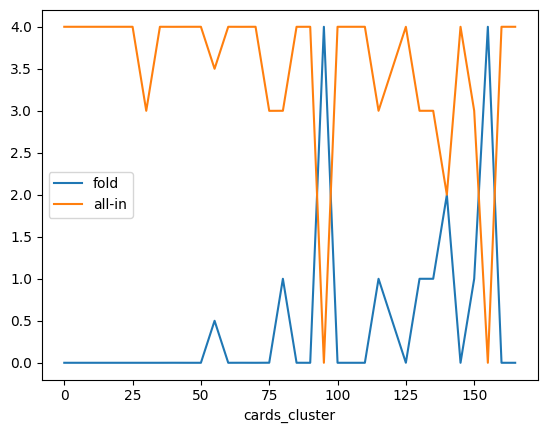

In [100]:
#strategy after initial raise for each cluster
df_strategy_afer_raise=df_strategy[df_strategy.pre_flop.astype(str).str.contains("raise")]
means=df_strategy_afer_raise[df_strategy_afer_raise["portion_bet"]==0.7].groupby("cards_cluster")[["fold","all-in"]].mean()
means.plot.line() 

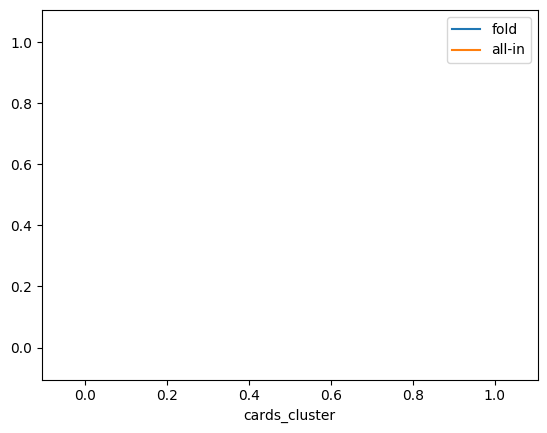

In [101]:
#check for wrong proprtion calculation
df_strategy_afer_raise=df_strategy[df_strategy.pre_flop.astype(str).str.contains("raise")]
means=df_strategy_afer_raise[df_strategy_afer_raise["portion_bet"]==0.69].groupby("cards_cluster")[["fold","all-in"]].mean()
means.plot.line() 

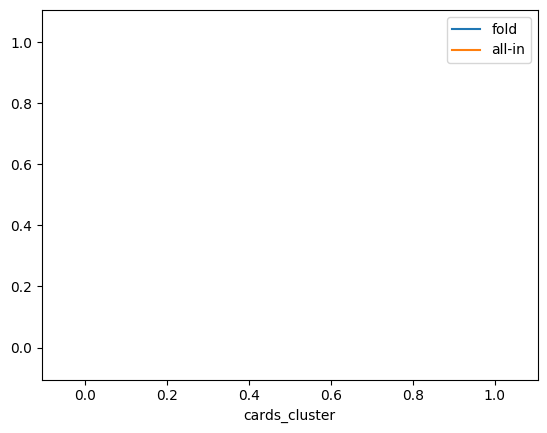

In [102]:
#strategy after initial raise for each cluster
df_strategy_afer_raise=df_strategy[df_strategy.pre_flop.astype(str).str.contains("raise")]
means=df_strategy_afer_raise[df_strategy_afer_raise["portion_bet"]==0.8].groupby("cards_cluster")[["fold","all-in"]].mean()
means.plot.line() 

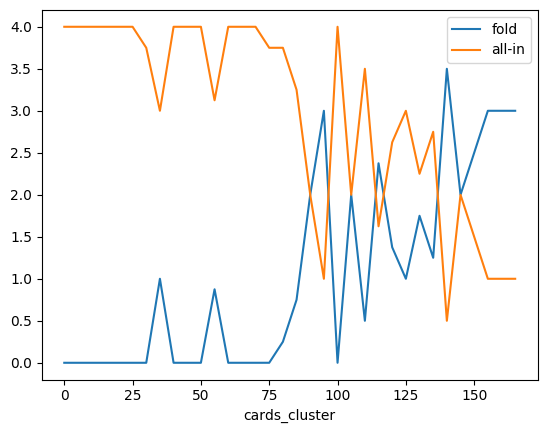

In [103]:
#strategy after initial raise for each cluster
df_strategy_afer_raise=df_strategy[df_strategy.pre_flop.astype(str).str.contains("raise")]
means=df_strategy_afer_raise.groupby("cards_cluster")[["fold","all-in"]].mean()
means.plot.line() 

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


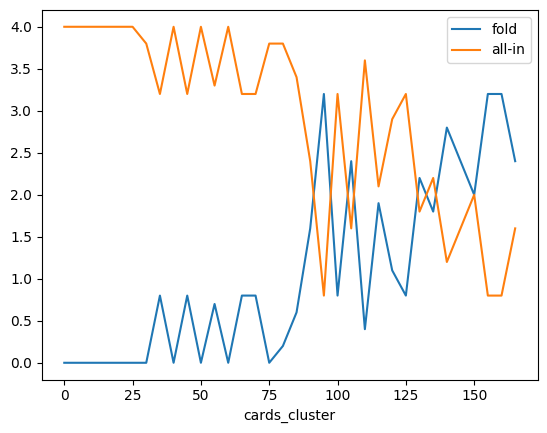

In [104]:
vis_key(e,"strategy")

/Users/antonkozackov/miniforge3/envs/poker_ai_x86/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


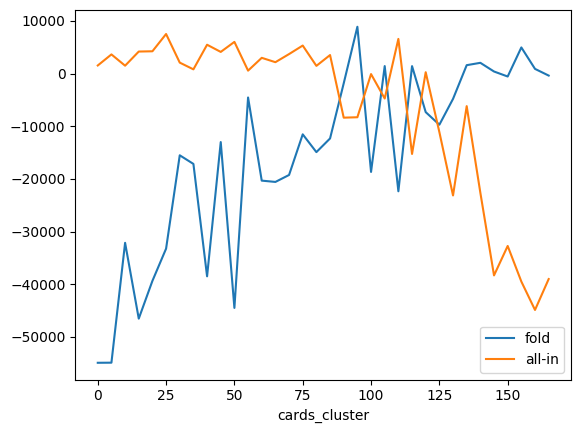

In [105]:
vis_key(e,"regret")